In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
import os
from astropy.table import Table
dirname = "/Users/aphearin/Dropbox/UniverseMachine/data/histories/prelim_sfh_reduction"
history_fname = "sfh_catalog_1.002310_smcut_9.50_formatted_histories.hdf5"
histories = Table.read(os.path.join(dirname, history_fname), path='data')

universe_age_array_fname = os.path.join(dirname, "times.npy")
universe_age_array = np.load(universe_age_array_fname)

In [6]:
from quenching_time import quenching_indices
from mass_loss import ssfr_t_now

In [17]:
ssfr_matrix = np.zeros_like(histories['sfh'])
for i, t in enumerate(universe_age_array):
    ssfr_matrix[:, i] = ssfr_t_now(histories['sfh'], t)

In [26]:
idx_quenching_times = quenching_indices(ssfr_matrix <= 1e-11)

In [27]:
quenching_times = universe_age_array[idx_quenching_times]

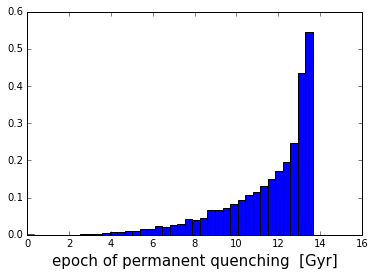

In [44]:
__ = plt.hist(quenching_times[quenching_times!=universe_age_array[-1]], 
              normed=True, bins=np.linspace(0, 14, 40))
plt.xlabel('epoch of permanent quenching  [Gyr]', size=15)